In [38]:
import pandas as pd
import re


# Membaca dataset dari file CSV
data = pd.read_csv("bank-full.csv", sep=';')

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].str.strip('\"')
        
data['job'] = data['job'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x)))

# Mengganti nilai 'yes' dan 'no' dengan 1 dan 0
data.replace({'yes': 1, 'no': 0}, inplace=True)

        
# Menyimpan dataset yang sudah diperbaiki ke dalam file CSV
data.to_csv("dataset_fixed.csv", index=False)


In [29]:
# Impor pustaka yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Impor dataset
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# Identifikasi data dan label

X = data.drop(['Age', 'Income'], axis=1) # Fitur
y = data['Personal Loan'] # Label

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penskalaan fitur jika diperlukan
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat objek SVC untuk Klasifikasi
classifier = SVC(kernel='linear')

# Sesuaikan set data (set pelatihan)
classifier.fit(X_train_scaled, y_train)

# Memprediksi hasil (set pengujian)
y_pred = classifier.predict(X_test_scaled)

# Evaluasi model
accuracy = classifier.score(X_test_scaled, y_test)
print("Akurasi Model: {:.2f}%".format(accuracy * 100))



Akurasi Model: 100.00%


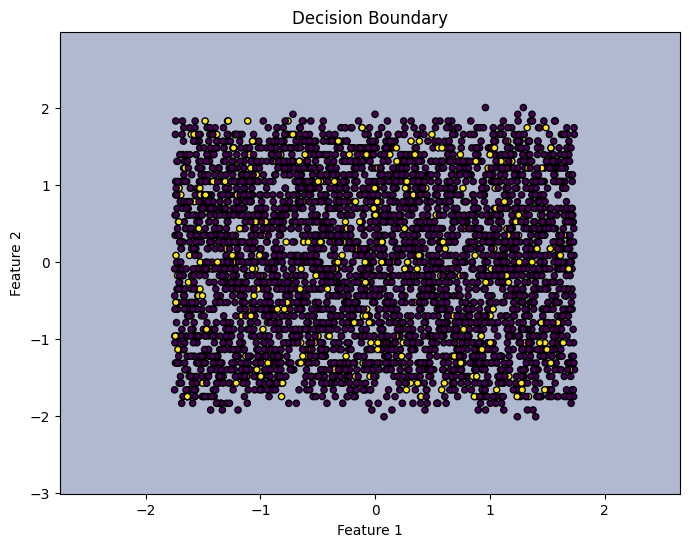

In [32]:
# Fungsi untuk plot data dengan garis pemisah
def plot_decision_boundary(X, y, classifier):
    plt.figure(figsize=(8, 6))

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), 
                                  np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), 
                                  np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), 
                                  np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())]) # Menggunakan 11 fitur yang ada di dataset
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(X_train_scaled[:, :2], y_train, classifier)


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Impor dataset

data = pd.read_csv('training_set.csv')

# Identifikasi data dan label


X = data.iloc[:, [5, 11]].values #fitur
y = data.iloc[:, 7].values #label


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0) # for non-linear model use this parametre kernel='rbf'
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#fungsi ini untuk 

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

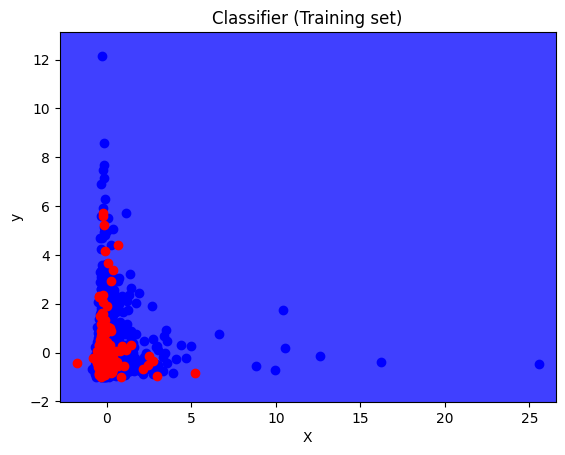

In [2]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# Membuat meshgrid untuk plot pada decision boundary
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Menggunakan classifier untuk predict  label pada meshgrid point
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)

# Reshape prediction ke bentuk meshgrid
Z = Z.reshape(X1.shape)

# Plot contour
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('blue', 'red')))

# Limit plot ke dalamam range data
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('blue', 'red'))(i), label=j)

plt.title('Classifier (Training set)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()